In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

In [4]:
print(X.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [5]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


### Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


In [8]:
rt = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=5)

In [9]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [10]:
y_pred = rt.predict(X_test)

In [11]:
r2_score(y_test, y_pred)

0.5997321244428706

In [12]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [13]:
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'x[0] <= 5.086\nfriedman_mse = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.25, 0.75, 'x[0] <= 3.074\nfriedman_mse = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[2] <= 4.314\nfriedman_mse = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.0625, 0.4166666666666667, 'x[0] <= 2.215\nfriedman_mse = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.03125, 0.25, 'x[2] <= 3.422\nfriedman_mse = 0.575\nsamples = 1404\nvalue = 1.377'),
 Text(0.015625, 0.08333333333333333, 'friedman_mse = 0.832\nsamples = 482\nvalue = 1.775'),
 Text(0.046875, 0.08333333333333333, 'friedman_mse = 0.314\nsamples = 922\nvalue = 1.169'),
 Text(0.09375, 0.25, 'x[5] <= 2.487\nfriedman_mse = 0.646\nsamples = 1220\nvalue = 1.913'),
 Text(0.078125, 0.08333333333333333, 'friedman_mse = 0.911\nsamples = 436\nvalue = 2.331'),
 Text(0.109375, 0.08333333333333333, 'friedman_mse = 0.348\nsamples = 784\nvalue = 1.68'),
 Tex

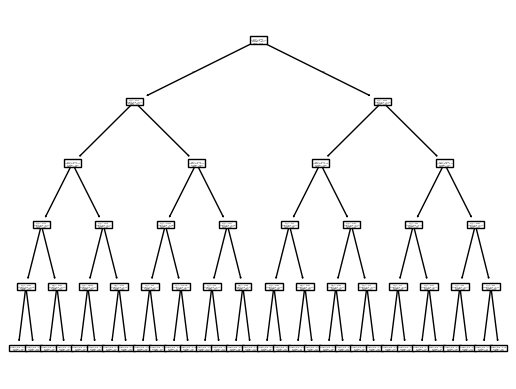

In [14]:
tree.plot_tree(rt)

### Hyperparameter Tuning

In [15]:
# param_grid = {
#     'max_depth':[2,6,None],
#     'criterion':['squared_error','absolute_error'],
#     'max_features':[0.25,0.5,1.0],
#     'min_samples_split':[0.25,0.5,1.0]
# }

param_grid = {
    'max_depth':[2,6,None],
    'criterion':['squared_error','absolute_error']
}

In [16]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [17]:
reg.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 6, None]})

In [18]:
reg.best_score_

np.float64(0.6564622810322304)

In [19]:
reg.best_params_

{'criterion': 'squared_error', 'max_depth': 6}

### Feature Importance

In [20]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns), reverse=True):
  print(name + " : " + str(importance))

MedInc : 0.7712117162048693
AveOccup : 0.12840674614888883
HouseAge : 0.04162087993608432
AveRooms : 0.03126072126800512
Latitude : 0.022049480286784377
Population : 0.002484998287182276
Longitude : 0.0020969502013759326
AveBedrms : 0.0008685076668099931
